# Assignment 1 - COMP 472


## Task 0
Remove document identifier, and also the topic label, which you don't need. 

In [93]:
from __future__ import division
from codecs import open

def read_documents(doc_file: str) -> (list, list):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels
    
# Reads provide doc file.
# Args --> doc_file (str): Path to given data file.
# Returns --> Tuple of lists (words, labels) 
 

In [94]:
all_docs, all_labels = read_documents("C:\\Users\\jlibe\\github\\COMP472-A1\\sample-text.txt")

split_point = int(0.80*len(all_docs))
train_docs = all_docs[:split_point]
train_labels = all_labels[:split_point]
eval_docs = all_docs[split_point:]
eval_labels = all_labels[split_point:]

For readability purposes I would like to use a data frame to match all of the reviews. Followed this [video](https://www.youtube.com/watch?v=CXi0iQoUgDk&ab_channel=metazoneTrainings-NeerajSharma) for setting this up.

In [95]:
import pandas as pd
import numpy as np

li = [train_labels, train_docs]
data = pd.DataFrame(li)
data_transpose = data.transpose()
data_transpose
#df = pd.DataFrame(data_transpose, columns=['sentiment'])
#print(df)

,0,1
0,neg,"[i, bought, this, album, because, i, loved, th..."
1,neg,"[i, was, misled, and, thought, i, was, buying,..."
2,neg,"[i, have, introduced, many, of, my, ell, ,, hi..."
3,pos,"[anything, you, purchase, in, the, left, behin..."
4,pos,"[i, loved, these, movies, ,, and, i, cant, wia..."
...,...,...
9526,pos,"[i, ,, too, ,, have, an, ma, in, american, his..."
9527,neg,"[the, positive, about, pccillin, is, that, it,..."
9528,neg,"[in, the, user, manual, there, is, a, whole, l..."
9529,pos,"[finally, ,, an, ab, video, that, makes, sense..."


## Task 1
Plot the distribution of the number of the instances in each class (books, camera, dvd, health, music, or software).


{'neg': 5914, 'pos': 6000}


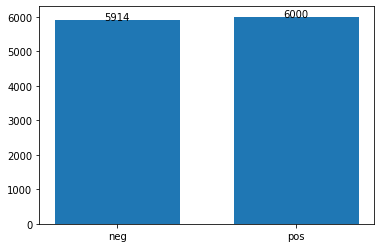

In [96]:
#Task 1 - Plot label distribution

import matplotlib.pyplot as plt

def get_label_distribution(all_labels: list) -> dict:
    
    labels = sorted(list(set(all_labels)))
    label_counts = {label: all_labels.count(label) for label in labels}
    return label_counts

# Calculates distribution of labels.
# Args --> all_labels (list): List of all labels.
# Returns -->  Dictionary keys (labels) and values (count)
# e.g. { 'health': 3, 'books': 45 }

# Get label distribution

label_distribution = get_label_distribution(all_labels)

print(label_distribution)

# Plot label distribution
plt.figure()
plt.bar(label_distribution.keys(), label_distribution.values(), 0.7)
for x, y in enumerate(label_distribution.values()):
    plt.text(x, y, str(y), horizontalalignment='center')
plt.show()

## Task 2

## Task 3

## Task 4


### References

[1] http://www.cse.chalmers.se/~richajo/dit862/assignment2.html#foot1
[2] https://scikit-learn.org/stable/modules/feature_extraction.html